# $2 \times 2$ Modified UT-Multiplier

This is a `7`-qubit circuit.

In [1]:
from qiskit import *

***

First we build a `half_adder` and `full_adder` using DraperQFT Adder Circuits.

`half_adder`

In [2]:
from qiskit.circuit.library import DraperQFTAdder

In [3]:
draper = DraperQFTAdder(1, kind = 'half')
ha = draper.to_gate(label = '1-bit DQFT Adder')

`ha` is 1-qubit Half-Adder.

***

Building the Circuit

In [4]:
inp = QuantumRegister(4, 'input')
out = QuantumRegister(3, 'output')
cbit = ClassicalRegister(4, 'cbits')
multiplier = QuantumCircuit(inp, out, cbit)

In [5]:
# taking input

for i in range(4) :
    multiplier.x(inp[i])

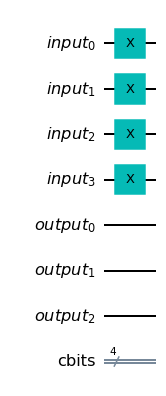

In [6]:
multiplier.draw('mpl')

In [7]:
# a0b0 = p0
multiplier.barrier()
multiplier.ccx(inp[0], inp[2], out[0])
multiplier.measure(out[0], cbit[0])

# reset out[0]
multiplier.reset(out[0])

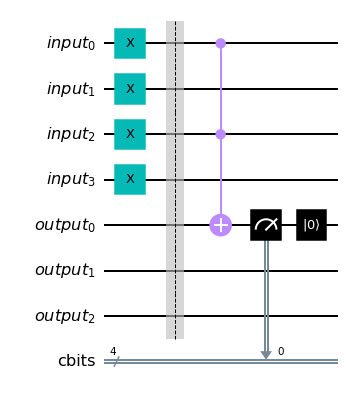

In [8]:
multiplier.draw('mpl')

In [9]:
# a0b1 + b0a1 = p1
# a0b0 = p0
multiplier.barrier()
multiplier.ccx(inp[0], inp[3], out[0])
multiplier.ccx(inp[1], inp[2], out[1])
multiplier.append(ha, [out[0], out[1], out[2]])
multiplier.measure(out[1], cbit[1])

# reseting out[0], out[1]
multiplier.reset(out[0])
multiplier.reset(out[1])

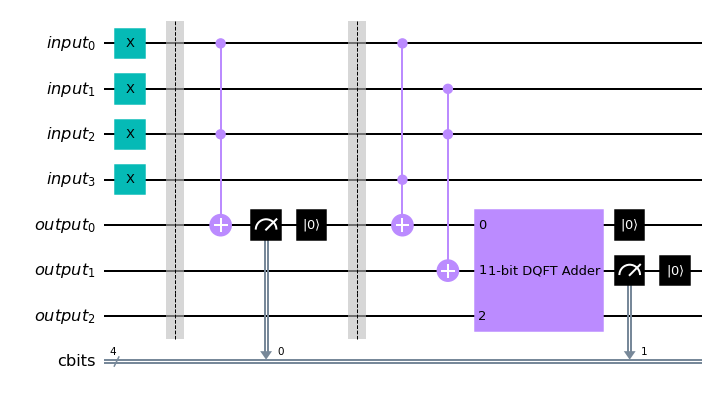

In [10]:
multiplier.draw('mpl')

In [11]:
# a1b1
multiplier.barrier()
multiplier.ccx(inp[1], inp[3], out[0])
multiplier.append(ha, [out[0], out[2], out[1]])
multiplier.measure(out[2], cbit[2])
multiplier.measure(out[1], cbit[3])

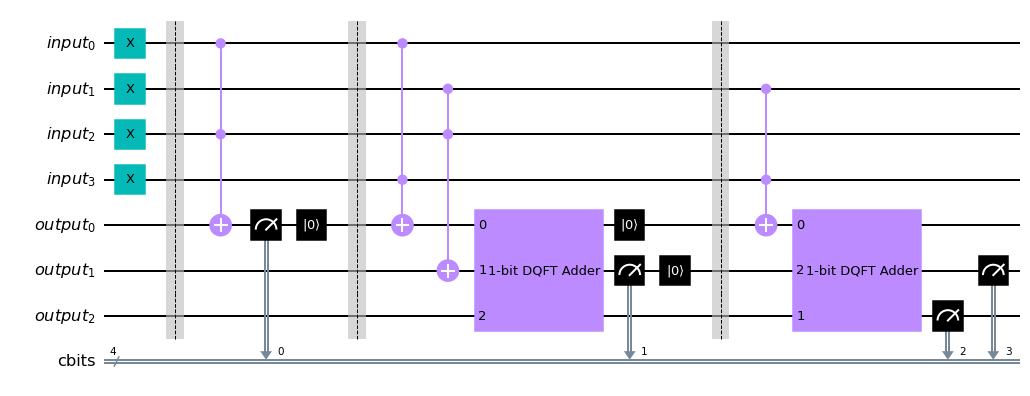

In [12]:
multiplier.draw('mpl')

***

After building the circuit, we simulate it.

In [13]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(multiplier, simulator).result()

In [14]:
from qiskit.visualization import plot_histogram

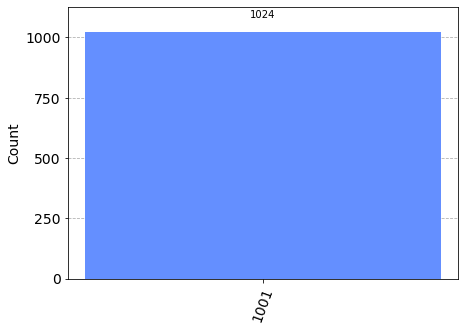

In [15]:
counts = result.get_counts()
plot_histogram(counts)

***

HANOI - NOISY SIMULATION

Simulation-1

In [20]:
from qiskit.providers.fake_provider import FakeHanoi
from qiskit.providers.aer import AerSimulator

In [21]:
# simulating the circuit on a fake simulator

hanoi = FakeHanoi()
simulator = AerSimulator.from_backend(hanoi)

In [22]:
compiled_circuit = transpile(multiplier, simulator)

In [23]:
%%time

# result = execute(compiled_circuit, simulator, counts = 1024).result()
result = execute(multiplier, simulator, counts = 1024).result()

CPU times: total: 2.69 s
Wall time: 946 ms


In [24]:
fake_counts = result.get_counts()

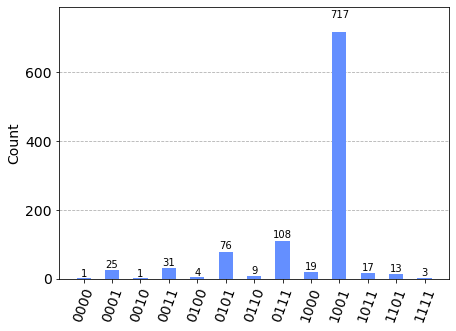

In [25]:
plot_histogram(fake_counts)

***

Simulation-2

In [26]:
# simulating the circuit on a fake simulator

hanoi = FakeHanoi()
simulator = AerSimulator.from_backend(hanoi)

In [27]:
compiled_circuit = transpile(multiplier, simulator)

In [28]:
%%time

# result = execute(compiled_circuit, simulator, counts = 1024).result()
result = execute(multiplier, simulator, counts = 1024).result()

CPU times: total: 2.55 s
Wall time: 757 ms


In [29]:
fake_counts = result.get_counts()

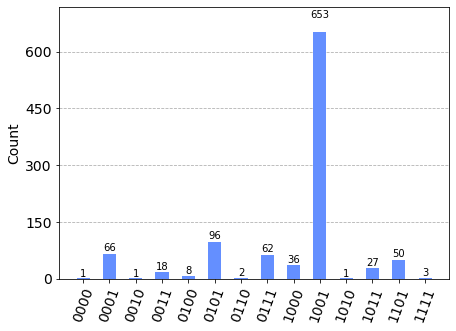

In [30]:
plot_histogram(fake_counts)

***

Simulation-3

In [31]:
# simulating the circuit on a fake simulator

hanoi = FakeHanoi()
simulator = AerSimulator.from_backend(hanoi)

In [32]:
compiled_circuit = transpile(multiplier, simulator)

In [33]:
%%time

# result = execute(compiled_circuit, simulator, counts = 1024).result()
result = execute(multiplier, simulator, counts = 1024).result()

CPU times: total: 2.86 s
Wall time: 945 ms


In [34]:
fake_counts = result.get_counts()

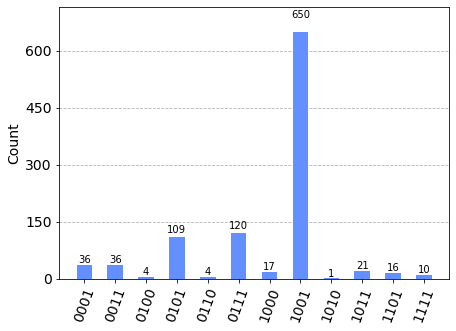

In [35]:
plot_histogram(fake_counts)